In [1]:
import cv2
import os
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
video_path = '/content/drive/MyDrive/CV_Project/video1.mp4'

In [3]:
video = cv2.VideoCapture(video_path)

In [4]:
success = True
count = 1

while success:
  success, frame = video.read()
  name = '/content/drive/MyDrive/CV_Project/Dataset/'+str(count)+'.jpg'
  if success == True:
    cv2.imwrite(name, frame)
    count = count+1
  else:
    break

"success = True\ncount = 1\n\nwhile success:\n  success, frame = video.read()\n  name = '/content/drive/MyDrive/CV_Project/Dataset/'+str(count)+'.jpg'\n  if success == True:\n    cv2.imwrite(name, frame)\n    count = count+1\n  else:\n    break"

In [5]:
for i in range(6801,6802):
  count = i
  path = '/content/drive/MyDrive/CV_Project/Dataset/'+str(100)+'.jpg'
  img = plt.imread(path)
  img = img[350:, 400:1150]
  name = '/content/drive/MyDrive/CV_Project/Dataset1/'+str(count)+'.jpg'
  cv2.imwrite(name, img)

"for i in range(6801,6802):\n  count = i\n  path = '/content/drive/MyDrive/CV_Project/Dataset/'+str(100)+'.jpg'\n  img = plt.imread(path)\n  img = img[350:, 400:1150]\n  name = '/content/drive/MyDrive/CV_Project/Dataset1/'+str(count)+'.jpg'\n  cv2.imwrite(name, img)"

In [6]:
data = []
for i in range(34, 6802,10):
  path = '/content/drive/MyDrive/CV_Project/Dataset1/'+str(i)+'.jpg'
  img = plt.imread(path)
  data.append(img)
data = np.array(data)

In [7]:
data.shape

(677, 370, 750, 3)

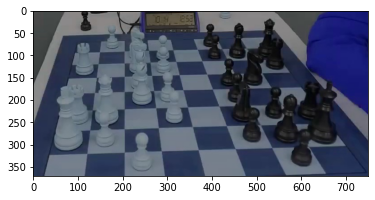

In [8]:
img = data[0]
plt.imshow(img)

In [9]:
data1 = []
for img in data:
 img1 = cv2.resize(img, (224, 224), interpolation = cv2.INTER_NEAREST)
 data1.append(img1)
data1 = np.array(data1)

In [10]:
data1.shape

(677, 224, 224, 3)

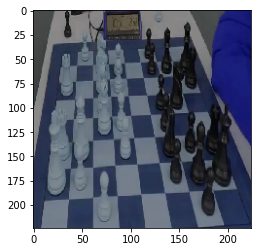

In [11]:
img = data1[0]
plt.imshow(img)

In [12]:
np.random.shuffle(data1)

In [13]:
data2 = []
labels = []
label = -1
for dir in os.listdir('/content/drive/MyDrive/CV_Project/Dataset2/output_train/'):
  label += 1
  for file in os.listdir('/content/drive/MyDrive/CV_Project/Dataset2/output_train/'+dir):
    if file.endswith("jpg"):
      path = '/content/drive/MyDrive/CV_Project/Dataset2/output_train/'+dir +'/'+ file
      img = plt.imread(path)
      data2.append(img) 
      labels.append(label)

In [14]:
data3 = []
for img in data2:
 img1 = cv2.resize(img, (224, 224), interpolation = cv2.INTER_NEAREST)
 data3.append(img1)
data3 = np.array(data3)

In [15]:
data3.shape

(1300, 224, 224, 3)

In [16]:
len(labels)

1300

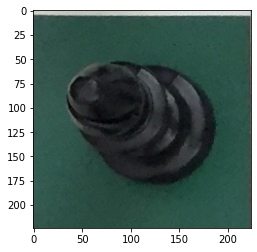

In [17]:
img = data3[0]
plt.imshow(img)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(data3, labels, test_size=0.1, random_state=42, shuffle = True)

In [19]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=5,
        rescale=1./255,
        horizontal_flip=True,
        fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_gen = datagen.flow_from_directory(
    '/content/drive/MyDrive/CV_Project/Dataset2/output_train/',
    target_size = (224,224),
    batch_size = 50,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle=True)
test_gen = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/CV_Project/Dataset2/output_test/',
    target_size = (224,224),
    batch_size = 50,
    class_mode = 'categorical',
    color_mode = 'rgb',
    shuffle=False)

Found 1300 images belonging to 13 classes.
Found 113 images belonging to 13 classes.


In [20]:
labels_name = ['bb', 'bk', 'bn', 'wb', 'wq', 'br', 'bq', 'wn', 'wk', 'empty', 'bq', 'wp', 'wr']

In [21]:
train_data = data1[:int(len(data1)*0.8)]
val_data = data1[int(len(data1)*0.8):int(len(data1)*0.9)]
test_data = data1[int(len(data1)*0.9):]

In [22]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.models import Model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
# Freeze convolutional layers from VGG16
for layer in base_model.layers:
    layer.trainable = False
# Establish new fully connected block
x = base_model.output
x = Flatten()(x) 
x = Dense(500, activation='relu')(x) 
x = Dense(500, activation='relu')(x)
predictions = Dense(13, activation='softmax')(x)
# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
test_gen

In [26]:
epochs = 5
history = model.fit(
    train_gen, 
    epochs=epochs,
    verbose = 1,
    validation_data=test_gen)

Epoch 1/5
26/26 [==============================] - 730s 28s/step - loss: 0.4156 - categorical_accuracy: 0.8823 - val_loss: 0.9390 - val_categorical_accuracy: 0.7257
Epoch 2/5
26/26 [==============================] - 732s 28s/step - loss: 0.2454 - categorical_accuracy: 0.9354 - val_loss: 1.0685 - val_categorical_accuracy: 0.6991
Epoch 3/5
26/26 [==============================] - 722s 28s/step - loss: 0.1921 - categorical_accuracy: 0.9569 - val_loss: 0.8170 - val_categorical_accuracy: 0.7434
Epoch 4/5
26/26 [==============================] - 720s 28s/step - loss: 0.1274 - categorical_accuracy: 0.9738 - val_loss: 0.8876 - val_categorical_accuracy: 0.7611
Epoch 5/5
26/26 [==============================] - 720s 28s/step - loss: 0.0829 - categorical_accuracy: 0.9854 - val_loss: 0.9168 - val_categorical_accuracy: 0.7434


In [27]:
model.save_weights('/content/drive/MyDrive/CV_Project/model_VGG16.h5')

In [28]:
def read_img(file):
    img = cv2.imread(str(file))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray_blur = cv2.blur(gray, (5, 5))
    return img, gray_blur

In [97]:
img, gray_blur = read_img('/content/drive/MyDrive/CV_Project/board_img.jpeg')

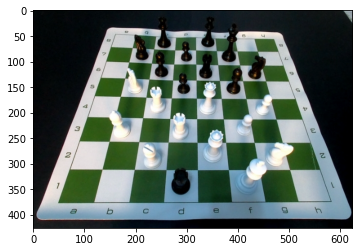

In [98]:
plt.imshow(img)

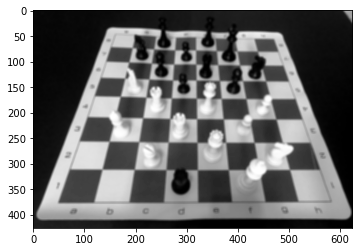

In [99]:
plt.imshow(gray_blur, cmap = 'gray')

In [101]:
def canny_edge(img, sigma=0.33):
    v = np.median(img)
    lower = int(max(0, (1.0 - sigma) * v))
    upper = int(min(255, (1.0 + sigma) * v))
    edges = cv2.Canny(img, lower, upper)
    return edges

In [102]:
edges = canny_edge(gray_blur)

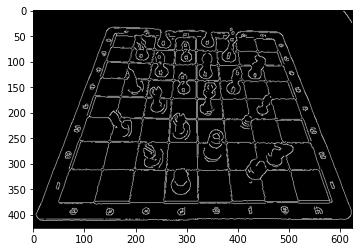

In [103]:
plt.imshow(edges, cmap = 'gray')

In [104]:
def hough_line(edges, min_line_length=100, max_line_gap=10):
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 125, min_line_length, max_line_gap)
    lines = np.reshape(lines, (-1, 2))
    return lines

In [105]:
lines = hough_line(edges)
lines

array([[ 1.4900000e+02,  3.6651915e-01],
       [ 4.0800000e+02,  1.5707964e+00],
       [ 2.5800000e+02,  1.5707964e+00],
       [ 3.1300000e+02,  1.5707964e+00],
       [ 3.1100000e+02,  1.5707964e+00],
       [ 3.7800000e+02,  1.5707964e+00],
       [ 3.7600000e+02,  1.5707964e+00],
       [-3.1500000e+02,  3.1241393e+00],
       [ 2.0600000e+02,  1.5882496e+00],
       [ 4.1300000e+02,  1.5533431e+00],
       [-4.3200000e+02,  2.7576201e+00],
       [-3.1700000e+02,  3.1241393e+00],
       [ 2.8100000e+02,  6.9813170e-02],
       [ 2.5300000e+02,  1.5882496e+00],
       [ 3.7300000e+02,  1.5707964e+00],
       [ 2.1200000e+02,  1.5707964e+00],
       [ 1.3100000e+02,  1.5882496e+00],
       [ 2.0800000e+02,  1.5882496e+00],
       [ 3.2100000e+02,  0.0000000e+00],
       [ 1.6700000e+02,  1.5882496e+00],
       [ 2.8300000e+02,  6.9813170e-02],
       [ 2.0700000e+02,  2.4434610e-01],
       [ 3.8100000e+02,  1.5533431e+00],
       [-3.4700000e+02,  3.0368729e+00],
       [ 3.83000

In [106]:
def h_v_lines(lines):
    h_lines, v_lines = [], []
    for rho, theta in lines:
        if theta < np.pi / 4 or theta > np.pi - np.pi / 4:
            v_lines.append([rho, theta])
        else:
            h_lines.append([rho, theta])
    return h_lines, v_lines

In [107]:
h_lines, v_lines = h_v_lines(lines) 
print("h_lines:", h_lines)
print("v_lines:", v_lines)

h_lines: [[408.0, 1.5707964], [258.0, 1.5707964], [313.0, 1.5707964], [311.0, 1.5707964], [378.0, 1.5707964], [376.0, 1.5707964], [206.0, 1.5882496], [413.0, 1.553343], [253.0, 1.5882496], [373.0, 1.5707964], [212.0, 1.5707964], [131.0, 1.5882496], [208.0, 1.5882496], [167.0, 1.5882496], [381.0, 1.553343], [383.0, 1.553343], [411.0, 1.5707964], [165.0, 1.5882496]]
v_lines: [[149.0, 0.36651915], [-315.0, 3.1241393], [-432.0, 2.75762], [-317.0, 3.1241393], [281.0, 0.06981317], [321.0, 0.0], [283.0, 0.06981317], [207.0, 0.2443461], [-347.0, 3.0368729], [-403.0, 2.8797932], [-422.0, 2.7925267], [286.0, 0.08726646], [245.0, 0.15707964]]


In [108]:
def line_intersections(h_lines, v_lines):
    points = []
    for r_h, t_h in h_lines:
        for r_v, t_v in v_lines:
            a = np.array([[np.cos(t_h), np.sin(t_h)], [np.cos(t_v), np.sin(t_v)]])
            b = np.array([r_h, r_v])
            inter_point = np.linalg.solve(a, b)
            points.append(inter_point)
    return np.array(points)

In [109]:
intersection_points = line_intersections(h_lines, v_lines) 
intersection_points

array([[  2.9840777, 408.       ],
       [322.16968  , 408.       ],
       [630.7698   , 408.00003  ],
       [324.16998  , 408.       ],
       [253.15602  , 408.       ],
       [321.       , 408.       ],
       [255.1609   , 408.       ],
       [111.61119  , 408.       ],
       [391.7939   , 408.00003  ],
       [526.5396   , 408.00003  ],
       [597.58295  , 408.00003  ],
       [251.3971   , 408.       ],
       [183.43309  , 408.       ],
       [ 60.563683 , 258.       ],
       [319.5514   , 258.       ],
       [570.16583  , 258.00003  ],
       [321.5517   , 258.       ],
       [263.64505  , 258.       ],
       [321.       , 258.       ],
       [265.64993  , 258.       ],
       [149.01039  , 258.       ],
       [376.02826  , 258.00003  ],
       [486.34723  , 258.00003  ],
       [542.98737  , 258.00003  ],
       [264.5204   , 258.       ],
       [207.19077  , 258.       ],
       [ 39.45116  , 313.       ],
       [320.51144  , 313.       ],
       [592.38727  ,

In [110]:
import scipy.spatial as spatial
import scipy.cluster as cluster
from collections import defaultdict
def cluster_points(points):
    dists = spatial.distance.pdist(points)
    single_linkage = cluster.hierarchy.single(dists)
    flat_clusters = cluster.hierarchy.fcluster(single_linkage, 15, 'distance')
    cluster_dict = defaultdict(list)
    for i in range(len(flat_clusters)):
        cluster_dict[flat_clusters[i]].append(points[i])
    cluster_values = cluster_dict.values()
    clusters = map(lambda arr: (np.mean(np.array(arr)[:, 0]), np.mean(np.array(arr)[:, 1])), cluster_values)
    return sorted(list(clusters), key=lambda k: [k[1], k[0]])

In [111]:
points = cluster_points(intersection_points)
points

[(108.57924, 132.9152),
 (179.8872, 134.15988),
 (226.67577, 134.97658),
 (273.8654, 135.80028),
 (319.2881, 136.59312),
 (363.34872, 137.36221),
 (454.4485, 138.95236),
 (499.9466, 139.74652),
 (522.5477, 140.14102),
 (95.231384, 167.68755),
 (171.1972, 169.01353),
 (221.14674, 169.8854),
 (271.2162, 170.75935),
 (319.69556, 171.60558),
 (367.0347, 172.43188),
 (463.87222, 174.12218),
 (512.7689, 174.97568),
 (536.79126, 175.39499),
 (79.13736, 209.6139),
 (160.83817, 210.56139),
 (214.60542, 211.18573),
 (268.1056, 211.80763),
 (320.1705, 212.41344),
 (371.29953, 213.00902),
 (474.61484, 214.21407),
 (527.2746, 214.8294),
 (552.84454, 215.12831),
 (61.30806, 256.06082),
 (149.30338, 256.82486),
 (207.29698, 257.32938),
 (264.61813, 257.82883),
 (320.70474, 258.31824),
 (376.1126, 258.80255),
 (486.82208, 259.77216),
 (543.8146, 260.27264),
 (571.18115, 260.51312),
 (39.835026, 312.0),
 (135.54668, 312.0),
 (198.638, 312.0),
 (260.51297, 312.0),
 (321.32944, 312.0),
 (381.7039, 312.00

In [112]:
from statistics import mean
def augment_points(points):
    points_shape = list(np.shape(points))
    augmented_points = []
    for row in range(int(points_shape[0] / 11)):
        start = row * 11
        end = (row * 11) + 10
        rw_points = points[start:end + 1]
        rw_y = []
        rw_x = []
        for point in rw_points:
            x, y = point
            rw_y.append(y)
            rw_x.append(x)
        y_mean = mean(rw_y)
        for i in range(len(rw_x)):
            point = (rw_x[i], y_mean)
            augmented_points.append(point)
    augmented_points = sorted(augmented_points, key=lambda k: [k[1], k[0]])
    return augmented_points

In [113]:
points = augment_points(points)
points

[(95.231384, 142.4862),
 (108.57924, 142.4862),
 (171.1972, 142.4862),
 (179.8872, 142.4862),
 (226.67577, 142.4862),
 (273.8654, 142.4862),
 (319.2881, 142.4862),
 (363.34872, 142.4862),
 (454.4485, 142.4862),
 (499.9466, 142.4862),
 (522.5477, 142.4862),
 (79.13736, 186.5767),
 (160.83817, 186.5767),
 (214.60542, 186.5767),
 (221.14674, 186.5767),
 (268.1056, 186.5767),
 (271.2162, 186.5767),
 (319.69556, 186.5767),
 (367.0347, 186.5767),
 (463.87222, 186.5767),
 (512.7689, 186.5767),
 (536.79126, 186.5767),
 (61.30806, 237.70535),
 (149.30338, 237.70535),
 (207.29698, 237.70535),
 (264.61813, 237.70535),
 (320.1705, 237.70535),
 (320.70474, 237.70535),
 (371.29953, 237.70535),
 (376.1126, 237.70535),
 (474.61484, 237.70535),
 (527.2746, 237.70535),
 (552.84454, 237.70535),
 (39.835026, 297.8689),
 (135.54668, 297.8689),
 (198.638, 297.8689),
 (260.51297, 297.8689),
 (321.32944, 297.8689),
 (381.7039, 297.8689),
 (486.82208, 297.8689),
 (500.8165, 297.8689),
 (543.8146, 297.8689),
 (

In [114]:
import math
def write_crop_images(img, points, img_count=0, folder_path='/content/drive/MyDrive/CV_Project/Data/raw_data/'):
    num_list = []
    shape = list(np.shape(points))
    start_point = shape[0] - 14

    if int(shape[0] / 11) >= 8:
        range_num = 8
    else:
        range_num = int((shape[0] / 11) - 2)

    for row in range(range_num):
        start = start_point - (row * 11)
        end = (start_point - 8) - (row * 11)
        num_list.append(range(start, end, -1))

    for row in num_list:
        for s in row:
            base_len = (points[s][0] - points[s+1][0])**2 + (points[s][1] -points[s+1][1])**2 
            base_len = math.sqrt(base_len)
            bot_left, bot_right = points[s], points[s + 1]
            start_x, start_y = int(bot_left[0]), int(bot_left[1] - (base_len * 2))
            end_x, end_y = int(bot_right[0]), int(bot_right[1])
            if start_y < 0:
                start_y = 0
            cropped = img[start_y: end_y, start_x: end_x]
            img_count += 1

            if (0 not in np.array(cropped).shape):
              cv2.imwrite('/content/drive/MyDrive/CV_Project/Data/raw_data/data_image' + str(img_count) + '.jpeg', cropped)
    return img_count

In [115]:
x_list = write_crop_images(img, points, 0) 

In [116]:
x_list

24

In [117]:
import glob
def grab_cell_files(folder_name='/content/drive/MyDrive/CV_Project/Data/raw_data/*'):
    img_filename_list = []
    for path_name in glob.glob(folder_name):
        img_filename_list.append(path_name)
    return img_filename_list

In [118]:
img_filename_list = grab_cell_files()
img_filename_list 

['/content/drive/MyDrive/CV_Project/Data/raw_data/data_image1.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image2.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image3.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image4.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image5.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image6.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image7.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image8.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image9.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image10.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image11.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image12.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image14.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image15.jpeg',
 '/content/drive/MyDrive/CV_P

In [119]:
import re
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

In [120]:
img_filename_list.sort(key=natural_keys)
img_filename_list 

['/content/drive/MyDrive/CV_Project/Data/raw_data/data_image1.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image2.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image3.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image4.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image5.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image6.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image7.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image8.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image9.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image10.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image11.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image12.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image14.jpeg',
 '/content/drive/MyDrive/CV_Project/Data/raw_data/data_image15.jpeg',
 '/content/drive/MyDrive/CV_P

In [134]:
import PIL
def convert_image_to_bgr_numpy_array(image_path, size=(224, 224)):
    image = PIL.Image.open(image_path).resize(size)
    img_data = np.array(image.getdata(), np.float32).reshape(*size, -1)
    # swap R and B channels
    img_data = np.flip(img_data, axis=2)
    return img_data

def prepare_image(image_path):
    im = convert_image_to_bgr_numpy_array(image_path)

    im[:, :, 0] -= 103.939
    im[:, :, 1] -= 116.779
    im[:, :, 2] -= 123.68

    im = np.expand_dims(im, axis=0)
    return im

def classify_cells(model, img_filename_list):
    category_reference = {0: 'b', 1: 'k', 2: 'n', 3: 'p', 4: 'q', 5: 'r', 6: '1', 7: 'B', 8: 'K', 9: 'N', 10: 'P',
                          11: 'Q', 12: 'R'}
    pred_list = []
    for filename in img_filename_list:
        img = prepare_image(filename)
        out = model.predict(img)
        top_pred = np.argmax(out)
        pred = category_reference[top_pred-1]
        pred_list.append(pred)

    return pred_list

In [137]:
pred = classify_cells(model, img_filename_list)
print(pred)

['K', 'K', 'k', 'q', 'q', 'Q', 'b', 'Q', 'K', 'q', 'r', 'B', 'b', 'B', 'b', 'K', 'q', 'q', 'q', 'r', 'B', 'N', 'B']


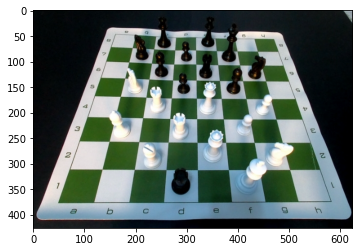

In [138]:
plt.imshow(img)